# 3-2 장. 네이버 영화 평점 분석
<분석 목적>
- 네이버 영화 평점을 기준으로 영화의 평점 변화를 확인해 볼 것이다
    - 즉, 영화별 날짜 변화에 따른 평점 변화를 확인해보려 한다

<네이버 영화 평점 사이트 설명>
- 네이버에서 영화 평점을 보여주는 사이트
- 인기 있는 영화를 알아볼 수도 있고, 지난 날짜의 인기도 확인할 수 있다
    - *영화 평점순으로 정렬되어 있는 정보가 나와있는 사이트* : https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806

**영화 평점순으로 정렬되어 있는 정보가 나와있는 사이트 URL 읽어오기**

In [1]:
from bs4 import BeautifulSoup  
import pandas as pd

In [2]:
from urllib.request import urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806"

page = urlopen(url_base + url_syb)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20170806" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


**영화 평점순으로 정렬되어 있는 정보가 나와있는 사이트에서 "영화 제목" 부분의 태그를 확인해서 찾기**
- 확인해보면, ```div 태그```에 ```tit5``` class 인 것을 알 수 있다

In [3]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154437" title="내 사랑">내 사랑</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10448" title="오즈의 마법사">오즈의 마법사</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=160135" title="서서평, 천천히 평온하게">서서평, 천천히 평온하게</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10217" title="로보캅">로보캅</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=76309" title="플립">플립</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=31827" title="헤드윅">헤드윅</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=153621" title="댄

- 예시로 일단 하나의 영화 제목만 뽑아내보기

In [4]:
soup.find_all('div', 'tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
</div>

In [5]:
soup.find_all('div', 'tit5')[0].a

<a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>

In [6]:
soup.find_all('div', 'tit5')[0].a.string

'다크 나이트'

- 이제 47개의 영화 제목에 대해서 위의 작업을 수행해주기!!

In [7]:
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, 47)]
movie_name

['다크 나이트',
 '킹 오브 프리즘 프라이드 더 히어로',
 '킹 오브 프리즘',
 '내 사랑',
 '오즈의 마법사',
 '서서평, 천천히 평온하게',
 '로보캅',
 '플립',
 '헤드윅',
 '댄서',
 '이터널 선샤인',
 '명탐정 코난:진홍의 연가',
 '샤인',
 '택시운전사',
 '올드보이',
 '어네스트와 셀레스틴',
 '기쿠지로의 여름',
 '파도가 지나간 자리',
 '노무현입니다',
 '파이트 클럽',
 '스타쉽 트루퍼스',
 '청원',
 '토탈 리콜',
 '극장판 짱구는 못말려 : 습격!! 외계인 덩덩이',
 '너의 이름은.',
 '연애담',
 '슈퍼배드 3',
 '꿈의 제인',
 '심야식당2',
 '라라랜드',
 '카3: 새로운 도전',
 '오두막',
 '스파이더맨: 홈커밍',
 '옥자',
 '500일의 썸머',
 '복수는 나의 것',
 '덩케르크',
 '예수는 역사다',
 '매치 포인트',
 '7번째 내가 죽던 날',
 '47 미터',
 '친절한 금자씨',
 '송 투 송',
 '그 후',
 '박쥐',
 '싸이보그지만 괜찮아',
 '군함도']

**영화의 평점(point) 찾기**
- 예시로 먼저 하나의 영화 평점을 뽑아내보기

In [8]:
soup.find_all('td', 'point')[0].string

'9.32'

- 이제 47개의 영화 평점에 대해 위의 작업을 수행해주기!!

In [9]:
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, 47)]
movie_point

['9.32',
 '9.27',
 '9.25',
 '9.24',
 '9.23',
 '9.23',
 '9.21',
 '9.20',
 '9.18',
 '9.14',
 '9.10',
 '9.10',
 '9.09',
 '9.08',
 '9.05',
 '9.05',
 '9.02',
 '9.00',
 '8.93',
 '8.91',
 '8.90',
 '8.87',
 '8.86',
 '8.83',
 '8.76',
 '8.75',
 '8.73',
 '8.70',
 '8.62',
 '8.59',
 '8.58',
 '8.48',
 '8.48',
 '8.47',
 '8.39',
 '8.34',
 '8.32',
 '8.12',
 '7.97',
 '7.84',
 '7.39',
 '7.26',
 '6.97',
 '6.59',
 '6.09',
 '5.17',
 '5.00']

**날짜를 5월 1일부터 100일간으로 정의하고, 해당 날짜의 영화 정보 전체를 찾아오기**

In [10]:
date = pd.date_range('2017-5-1', periods = 100, freq = 'D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [11]:
import urllib
from tqdm import tqdm_notebook

movie_date = []   # 날짜
movie_name = []   # 영화 제목
movie_point = []  # 영화 평점

for today in tqdm_notebook(date):
    # {date}라고 해준 이유는 아래의 response 변수에서 {date}를 변수로 취급하고 내용을 바꿀 것이기 때문! 
    html = "http://movie.naver.com/" + "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    
    response = urlopen(html.format(date = urllib.parse.quote(today.strftime('%Y%m%d'))))
    
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point')) # 영화 평점의 길이(len): 47
    
    # 날짜
    movie_date.extend([today for n in range(0, end)])
    # 영화 제목
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    # 영화 평점
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [12]:
len(movie_date), len(movie_name), len(movie_point)

(4723, 4723, 4723)

**위에서 작업해준 내용들을 모아서, 하나의 데이터 프레임을 생성**
- 즉, 날짜별로 영화와 포인트가 저장된 데이터 프레임 생성

In [13]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie.head()

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


- 생성된 데이터 프레임을 살펴보면, point 변수의 데이터 타입이 '숫자형'이 아님을 알 수 있다
- 따라서 point 변수의 데이터 타입을 'float'형으로 변경해줘야 한다!

In [14]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


In [15]:
# point 변수의 타입을 'float'으로 변경
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [16]:
import numpy as np

# np.sum 을 사용해서 영화별 점수의 합계를 출력
movie_unique = pd.pivot_table(movie, index = ['name'], aggfunc = np.sum)
movie_best = movie_unique.sort_values(by = 'point', ascending = False)
movie_best.head()

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


In [17]:
# 이와 같이, 특정 영화에 대한 정보만 불러올 수도 있다
tmp = movie.query('name == ["노무현입니다"]')
tmp

,date,name,point
1162,2017-05-25,노무현입니다,9.20
1215,2017-05-26,노무현입니다,8.97
1255,2017-05-27,노무현입니다,9.04
1298,2017-05-28,노무현입니다,9.04
1340,2017-05-29,노무현입니다,9.05
...,...,...,...
4501,2017-08-04,노무현입니다,8.93
4549,2017-08-05,노무현입니다,8.93
4596,2017-08-06,노무현입니다,8.93
4642,2017-08-07,노무현입니다,8.93


**날짜별 평점의 변화를 시각화해서 확인**
- 앞에서 "*노무현입니다*" 라는 영화에 대한 정보를 tmp 에 저장했는데, 이 tmp 데이터를 사용했다
- 이 영화가 무슨 내용의 영화인지는 모르겠으나, 날짜가 지날수록 평점이 낮아지는 것을 확인할 수 있다 

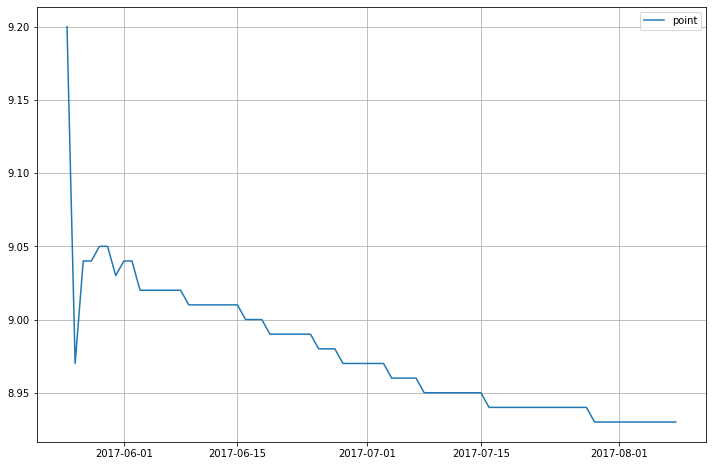

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12, 8))
plt.plot(tmp['date'], tmp['point'], label = 'point')
plt.legend(loc = 'best') # 최적의 범례(legend) 위치를 지정하도록 설정
plt.grid()
plt.show()

**<영화별 날짜 변화에 따른 평점 변화 확인하기>**
- 날짜별로 영화와 포인트가 저장된 데이터 프레임을 ```pivot_table()``` 을 사용해서 *세로 축* 으로 "*날짜*" 를, *가로 축*에 "*영화 제목*" 을 넣어주었다

In [19]:
movie_pivot = pd.pivot_table(movie, index = ['date'], columns = ['name'], values = ['point'])
movie_pivot

point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
...          ...   ...      ...          ...         ...      ...  ...   
2017-08-04   NaN  7.40     8.39          NaN        7.84      NaN  NaN   
2017-08-05   NaN  7.40     8.39          NaN        7.84      NaN  NaN   
2017-08-06   NaN  7.39     8.39          NaN        7.84      NaN  NaN   
2017-08-07   NaN  7.39     8.39          NaN        7.84      NaN  NaN   
2017-08-08   NaN  7.38     8.39          NaN        7.85      NaN  NaN   

                                                ...                         \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   
...                ...                ...  ...  ...        ...         ...   
2017-08-04         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-05         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-06         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-07         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-08         NaN                NaN  NaN  ...        NaN         NaN   

                                                                           \
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕   헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱   
date                                                                        
2017-05-01  8.78          8.89   NaN   8.70   NaN   NaN              9.20   
2017-05-02  8.78          8.89   NaN   8.68   NaN   NaN              9.21   
2017-05-03  8.78          8.89   NaN   8.70   NaN   NaN              9.22   
2017-05-04  8.78           NaN   NaN   8.67   NaN   NaN              9.23   
2017-05-05  8.78           NaN   NaN   8.69   NaN   NaN              9.24   
...          ...           ...   ...    ...   ...   ...               ...   
2017-08-04   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-05   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-06   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-07   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-08   NaN           NaN   NaN    NaN  9.18   NaN               NaN   

                   
name       히든 피겨스  
date               
2017-05-01   9.38  
2017-05-02   9.37  
2017-05-03   9.38  
2017-05-04   9.38  
2017-05-05   9.37  
...           ...  
2017-08-04    NaN  
2017-08-05    NaN  
2017-08-06    NaN  
2017-08-07    NaN  
2017-08-08    NaN  

[100 rows x 204 columns]

- 위의 피벗 테이블과 아래의 피벗 테이블을 비교해보면, ```point``` 라는 level이 피벗 테이블에서 사라진 것을 확인할 수 있다 

In [20]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


**아래의 코드는 ```matplotlib``` 의 한글 문제를 설정해주는 작업!!**

In [21]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~') 

**이제 내가 관심 있는 영화들을 지정해서 날짜별 평점 변화를 확인해볼까요~**

<내가 관심 있는 영화들>
- 택시운전사
- 47 미터
- 라라랜드
- 스파이더맨: 홈커밍
- 500일의 썸머

<시각화 결과 해석>
- 개인적으로 "47 미터"라는 영화는 한 번 볼까 생각했었는데, 이 시각화 결과를 보고 마음이 바뀌었다
    - 평점이 좀 낮네...^^
- 그리고 모두가 알 듯, "라라랜드"는 높은 평점이 유지되는 것을 확인할 수 있었다! (하지만 난 아직도 "라라랜드"를 보지 못한게 함정...)
- 스파이더맨의 경우, 시간이 지날수록 평점이 점점 낮아지는 추세를 보였다 (왜지?)
- "500일의 썸머"의 경우에는 로맨스 분야에서 나름 유명한 영화라 그런지, 평점이 생각보다 높은 편으로 유지되고 있다
- 마지막으로 "택시운전사"는 시간이 지날수록 오히려 평점이 올라가고 있는 추세다. 
    - 역시 역사적인 사건을 소재로 한 영화라서 그런가, 많은 사람들의 공감을 이끌어 낸 것 같다!

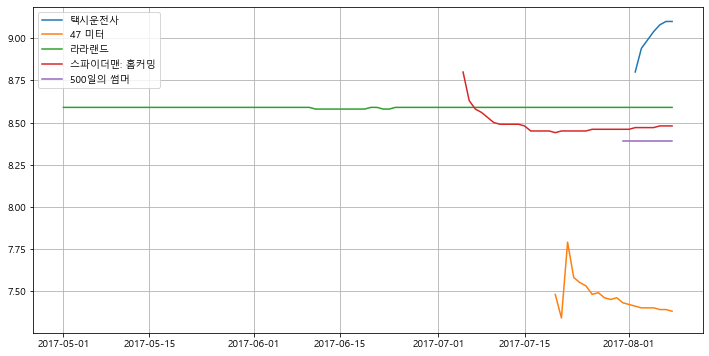

In [22]:
target_col = ['택시운전사', '47 미터', '라라랜드', 
              '스파이더맨: 홈커밍', '500일의 썸머']

plt.figure(figsize = (12, 6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc = 'best')
plt.grid()
plt.show()